In [43]:
# Dependencies
from citipy import citipy
from random import uniform
import json
import requests
from pprint import pprint
from config import api_key
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Retrive 1000 citites objects from citipy
cities = []

while len(cities) <1000:
    latitude = uniform(90, -90)
    longitude = uniform(180, -180)
    new_city = citipy.nearest_city(latitude, longitude)
    if new_city not in cities:
        cities.append(new_city)    

In [4]:
# Building query and retreiving API query
city_info=[]
city_num = 0
for city in cities:
    city_num+=1
    base_url = "http://api.openweathermap.org/data/2.5/weather?q="
    query_url = (f"{base_url}{city.city_name},{city.country_code}&units=imperial&appid={api_key}")
    weather_response= requests.get(query_url)
    city_info.append(weather_response.json())
    print(f"City count: {city_num}\n Retrieving data for {city.city_name} in {city.country_code}.")

City count: 1
 Retrieving data for chumphon in th.
City count: 2
 Retrieving data for jibuti in dj.
City count: 3
 Retrieving data for rikitea in pf.
City count: 4
 Retrieving data for pevek in ru.
City count: 5
 Retrieving data for airai in pw.
City count: 6
 Retrieving data for kapaa in us.
City count: 7
 Retrieving data for omboue in ga.
City count: 8
 Retrieving data for turbat in pk.
City count: 9
 Retrieving data for new norfolk in au.
City count: 10
 Retrieving data for viligili in mv.
City count: 11
 Retrieving data for mys shmidta in ru.
City count: 12
 Retrieving data for bandar-e anzali in ir.
City count: 13
 Retrieving data for vaini in to.
City count: 14
 Retrieving data for dawlatabad in af.
City count: 15
 Retrieving data for umzimvubu in za.
City count: 16
 Retrieving data for salekhard in ru.
City count: 17
 Retrieving data for cherskiy in ru.
City count: 18
 Retrieving data for tsumeb in na.
City count: 19
 Retrieving data for sangar in ru.
City count: 20
 Retrieving 

In [5]:
# Pretty Print response
pprint(city_info)

[{'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 10.3333, 'lon': 98.8333},
  'dt': 1616739920,
  'id': 1153555,
  'main': {'feels_like': 93.22,
           'humidity': 55,
           'pressure': 1010,
           'temp': 89.51,
           'temp_max': 93.2,
           'temp_min': 86},
  'name': 'Chumphon',
  'sys': {'country': 'TH',
          'id': 9269,
          'sunrise': 1616714720,
          'sunset': 1616758516,
          'type': 1},
  'timezone': 25200,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 60, 'speed': 8.05}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 11.5, 'lon': 42.5},
  'dt': 1616739926,
  'id': 223816,
  'main': {'feels_like': 84.96,
           'humidity': 61,
           'pressure': 1014,
           'temp': 82.4,
           'temp_max': 82.4,
           'temp_min': 82.4

In [58]:
# Function to get values from a dictionary
def safe_get(d, *keys):
    value = d
    for key in keys:
        value = value.get(key,None)
        if value is None: break
    return value

# Using list comprehension to retrieve desired data by iterating through dicts in city_info and using function "safe_get".
weather_city_info = [
    {
        "City": safe_get(city,"name"),
        "Country": safe_get(city,"sys","country"), 
        "Latitude": safe_get(city, "coord","lat"),
        "Longitude": safe_get(city, "coord","lon"),
        "Temperature (F)": safe_get(city, "main","temp"),
        "Humidity %": safe_get(city,"main", "humidity"),
        "Cloudiness %": safe_get(city, "clouds","all"),
        "Wind Speed (mph)": safe_get(city, "wind","speed")
    } for city in city_info
]
pprint(weather_city_info)


[{'City': 'Chumphon',
  'Cloudiness %': 40,
  'Country': 'TH',
  'Humidity %': 55,
  'Latitude': 10.3333,
  'Longitude': 98.8333,
  'Temperature (F)': 89.51,
  'Wind Speed (mph)': 8.05},
 {'City': 'Djibouti',
  'Cloudiness %': 1,
  'Country': 'DJ',
  'Humidity %': 61,
  'Latitude': 11.5,
  'Longitude': 42.5,
  'Temperature (F)': 82.4,
  'Wind Speed (mph)': 6.91},
 {'City': 'Rikitea',
  'Cloudiness %': 98,
  'Country': 'PF',
  'Humidity %': 72,
  'Latitude': -23.1203,
  'Longitude': -134.9692,
  'Temperature (F)': 80.24,
  'Wind Speed (mph)': 21.05},
 {'City': 'Pevek',
  'Cloudiness %': 92,
  'Country': 'RU',
  'Humidity %': 96,
  'Latitude': 69.7008,
  'Longitude': 170.3133,
  'Temperature (F)': -20.94,
  'Wind Speed (mph)': 1.32},
 {'City': None,
  'Cloudiness %': None,
  'Country': None,
  'Humidity %': None,
  'Latitude': None,
  'Longitude': None,
  'Temperature (F)': None,
  'Wind Speed (mph)': None},
 {'City': 'Kapaa',
  'Cloudiness %': 90,
  'Country': 'US',
  'Humidity %': 94,


In [59]:
weather_city_info_df = pd.DataFrame(weather_city_info)
weather_city_info_df

,City,Country,Latitude,Longitude,Temperature (F),Humidity %,Cloudiness %,Wind Speed (mph)
0,Chumphon,TH,10.3333,98.8333,89.51,55.0,40.0,8.05
1,Djibouti,DJ,11.5000,42.5000,82.40,61.0,1.0,6.91
2,Rikitea,PF,-23.1203,-134.9692,80.24,72.0,98.0,21.05
3,Pevek,RU,69.7008,170.3133,-20.94,96.0,92.0,1.32
4,None,None,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
995,Benguela,AO,-12.5763,13.4055,75.79,89.0,100.0,1.57
996,Arlit,NE,18.7369,7.3853,69.44,13.0,0.0,14.07
997,Itaituba,BR,-4.2761,-55.9836,71.15,99.0,100.0,1.32
998,Camargo,MX,27.6667,-105.1667,54.63,15.0,0.0,7.90


In [60]:
# Find count of empty dictionaries
len([entry for entry in weather_city_info if entry["City"] is None])

101

In [61]:
# Drop rows without city information with dropna()
clean_weather_city_info_df= weather_city_info_df.dropna()

In [62]:
clean_weather_city_info_df

,City,Country,Latitude,Longitude,Temperature (F),Humidity %,Cloudiness %,Wind Speed (mph)
0,Chumphon,TH,10.3333,98.8333,89.51,55.0,40.0,8.05
1,Djibouti,DJ,11.5000,42.5000,82.40,61.0,1.0,6.91
2,Rikitea,PF,-23.1203,-134.9692,80.24,72.0,98.0,21.05
3,Pevek,RU,69.7008,170.3133,-20.94,96.0,92.0,1.32
5,Kapaa,US,22.0752,-159.3190,68.20,94.0,90.0,9.22
...,...,...,...,...,...,...,...,...
994,Filadelfia,PY,-22.3500,-60.0333,76.19,63.0,0.0,7.90
995,Benguela,AO,-12.5763,13.4055,75.79,89.0,100.0,1.57
996,Arlit,NE,18.7369,7.3853,69.44,13.0,0.0,14.07
997,Itaituba,BR,-4.2761,-55.9836,71.15,99.0,100.0,1.32


In [63]:
# Write data frame data into csv
clean_weather_city_info_df.to_csv('Outputs/weather_data.csv', index= False, header= True)


In [64]:
# Copy data frame for integrity
data_df = clean_weather_city_info_df.copy()


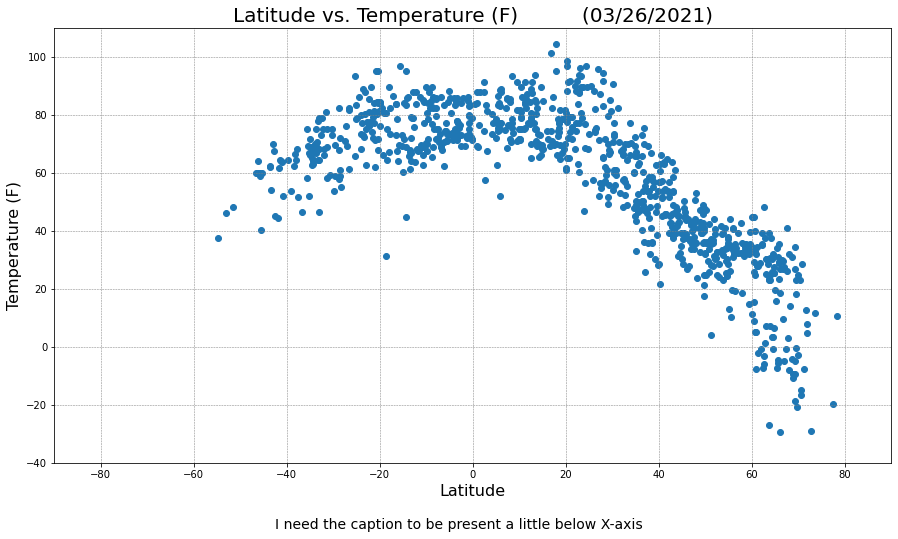

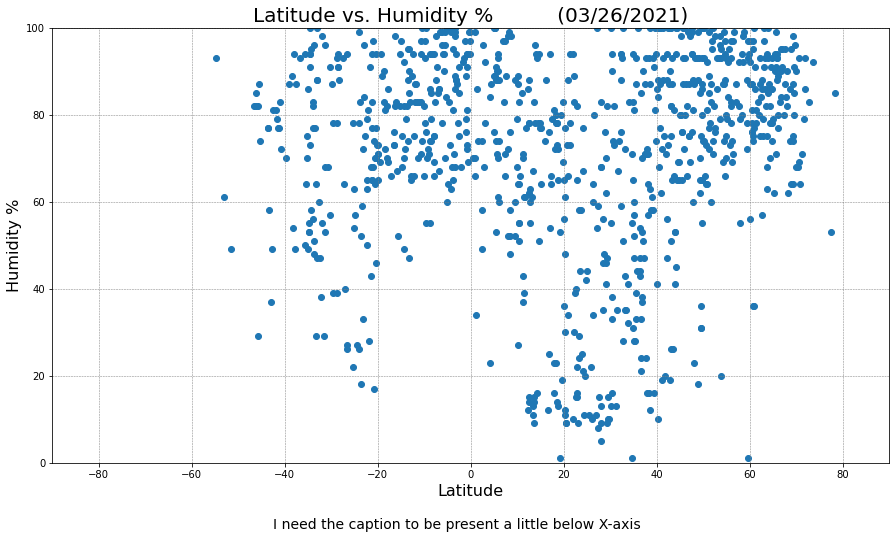

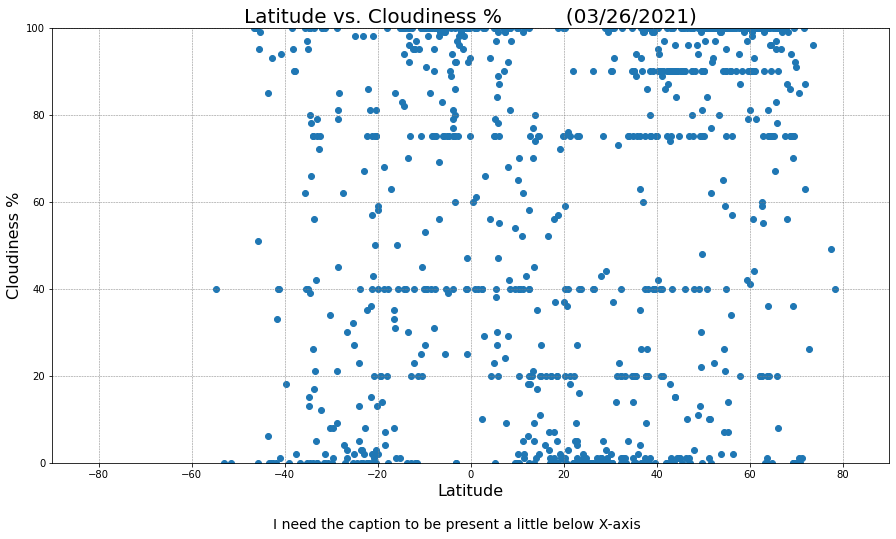

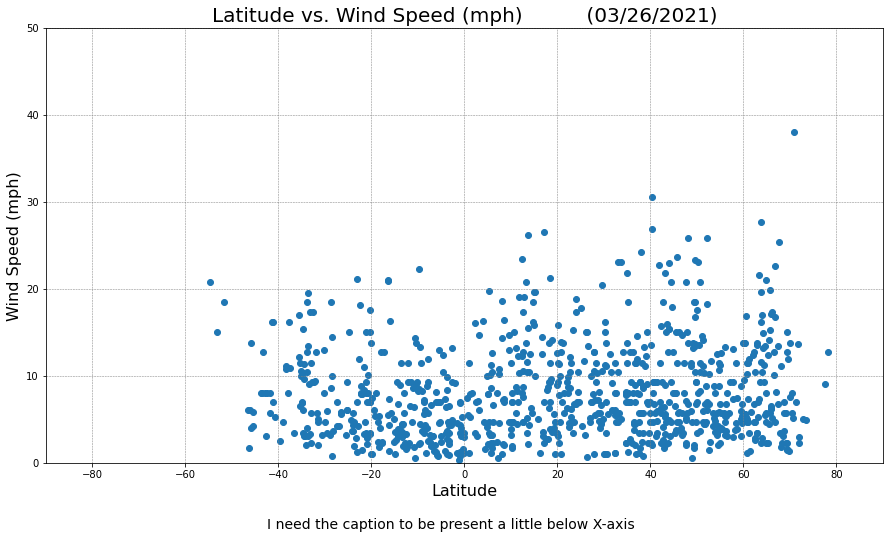

In [79]:
# Function to make scatter plots:
column_names=["Temperature (F)", "Humidity %", "Cloudiness %", "Wind Speed (mph)"]
for type in column_names:
    plt.figure(figsize= (15,8))
    plt.scatter(data_df["Latitude"], data_df[type])
    plt.xlim([-90, 90])
    if type == "Temperature (F)":
        plt.ylim(round(min(data_df[type]),-1)-10,round(max(data_df[type]),-1)+10)
    elif type == "Wind Speed (mph)":
        plt.ylim(0,round(max(data_df[type]),-1)+10)
    else:
        plt.ylim([0,100])
    plt.title(f"Latitude vs. {type}          (03/26/2021)", fontsize=20)
    plt.xlabel("Latitude", fontsize=16)
    plt.ylabel(type, fontsize=16)
    plt.grid(color= "gray", linestyle="--", linewidth= 0.5)
    txt="I need the caption to be present a little below X-axis"
    plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=14)
    plt.show()